In [14]:
# impoer the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# arabic plotting
import arabic_reshaper
from bidi.algorithm import get_display

# handeling spacial data
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium
from folium.plugins import FastMarkerCluster


In [3]:
## uncomment the following lines to install arabic_reshaper and bidi.algorithm
# pip install arabic-reshaper
# pip install python-bidi

In [4]:
# read in the dataset

data = pd.read_csv("SA_Aqar.csv", encoding="UTF-8")

In [5]:
# look at the head
data.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [6]:
# a closer look at the features of the dataset
data_columns = {}
for column in data.columns:
  key = column
  if data[column].nunique() > 5:
    value = data[column].nunique()
  else:
    value = (data[column].nunique(), list(data[column].unique()))
  data_columns[key] = value



categorical = ['city', 'front', 'kitchen', 'garage',  'driver_room', 'maid_room',  'furnished',   
'ac', 'roof', 'pool', 'frontyard',  'basement', 'duplex',  'stairs',  'elevator', 'fireplace']

len(data_columns), data_columns


(24,
 {'city': (4, [' الرياض', ' جدة', ' الدمام', ' الخبر']),
  'district': 174,
  'front': 10,
  'size': 199,
  'property_age': 36,
  'bedrooms': 7,
  'bathrooms': (5, [5, 4, 3, 2, 1]),
  'livingrooms': (5, [1, 2, 3, 4, 5]),
  'kitchen': (2, [1, 0]),
  'garage': (2, [1, 0]),
  'driver_room': (2, [0, 1]),
  'maid_room': (2, [1, 0]),
  'furnished': (2, [0, 1]),
  'ac': (2, [0, 1]),
  'roof': (2, [0, 1]),
  'pool': (2, [0, 1]),
  'frontyard': (2, [1, 0]),
  'basement': (2, [0, 1]),
  'duplex': (2, [1, 0]),
  'stairs': (2, [1, 0]),
  'elevator': (2, [0, 1]),
  'fireplace': (2, [0, 1]),
  'price': 113,
  'details': 1429})

### Questions to ask:

* Which city has the highest rent rate?
* Does the district within a city play a role in increasing the rent rate?
* Do the number of various features within a house increase its rent rate?
* Which has a higher impact on the rent price: location or features?

In [7]:
data["city"].values, data["district"].values, data["front"].values

(array([' الرياض', ' الرياض', ' الرياض', ..., ' الخبر', ' الخبر', ' الخبر'],
       dtype=object),
 array(['   حي العارض ', '   حي القادسية ', '   حي القادسية ', ...,
        '   حي اللؤلؤ ', '   حي الكورنيش ', '   حي الامواج '], dtype=object),
 array(['شمال', 'جنوب', 'جنوب', ..., 'غرب', 'جنوب', 'غرب'], dtype=object))

In [8]:
# this works because we added the space in the words

# city
print(f'Number of observations with (الرياض ): {len(data[data["city"] ==  "الرياض"])}')
# district
print(f'Number of observations with ( حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')


Number of observations with (الرياض ): 0
Number of observations with ( حي العليا): 0
Number of observations with (غرب): 771


In [9]:
# but this doesnt work for some because we didnt add the space

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 0
Number of observations with (حي العليا): 0
Number of observations with (غرب): 771


In [10]:
# fix the space surrounding the words

data["city"] = data["city"].apply(lambda city: city.strip())
data["district"] = data["district"].apply(lambda city: city.strip())
data["front"] = data["front"].apply(lambda city: city.strip())


In [11]:
# check if stripping the space worked

# city
print(f'Number of observations with (الرياض): {len(data[data["city"] == "الرياض"])}')
# district

print(f'Number of observations with (حي العليا): {len(data[data["district"] == "حي العليا"])}')
# front
print(f'Number of observations with (غرب): {len(data[data["front"] == "غرب"])}')

Number of observations with (الرياض): 960
Number of observations with (حي العليا): 80
Number of observations with (غرب): 771


Great now we continue with exploring the data, lets study the effect a city has on its rent prices

In [12]:
# make a function to plot arabic labels
def plot_arabic(labelsSeries: pd.Series):
    """
    A function that plots arabic literals in their required format instead of just floating letters
    \nArgs:
     - labelsSeries: a series of arabic labels 
    \nReturns:
     - result: a list of properly formatted arabic labels
    """

    # apply the reshaping method
    arabicLabels = labelsSeries.apply(arabic_reshaper.reshape)

    # initiate the formatting process
    result = []
    for label in arabicLabels:
        result.append(get_display(label))
    
    # return the formatted labels as a list if there are more than one value
    if len(result) == 1:
        return result[0]
    else:
        return result

plot_arabic(data['district'])

['ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ',
 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ',
 'ﺔﻟﺰﻴﻌﻤﻟﺍ ﻲﺣ',
 'ﺎﻴﻠﻌﻟﺍ ﻲﺣ',
 'ﺭﺎﻫﺩﺯﻻﺍ ﻲﺣ',
 'ﺔﻳﺪﻬﻤﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﻡﺰﺤﻟﺍ ﻲﺣ',
 'ﺎﻴﻠﻌﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﻓﺎﺤﺼﻟﺍ ﻲﺣ',
 'ﻥﺎﺒﻨﺑ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﻲﺑﺮﻐﻟﺍ ﻢﻴﺴﻨﻟﺍ ﻲﺣ',
 'ﺭﺎﻫﺩﺯﻻﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﺰﻠﻤﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﺔﻴﻧﺎﻤﻴﻠﺴﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﻖﻴﻘﻌﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﺕﻼﺳﺮﻤﻟﺍ ﻲﺣ',
 'ﻖﻴﻘﻌﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﺔﻴﻧﺎﻤﺣﺮﻟﺍ ﻲﺣ',
 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ',
 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ',
 'ﻖﻳﻮﻃ ﻲﺣ',
 'ﺎﻘﻠﻤﻟﺍ ﻲﺣ',
 'ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﻟﺰﻴﻌﻤﻟﺍ ﻲﺣ',
 'ﺔﻫﺰﻨﻟﺍ ﻲﺣ',
 'ﺔﻟﺰﻴﻌﻤﻟﺍ ﻲﺣ',
 'ﺔﻴﻧﺎﻤﻴﻠﺴﻟﺍ ﻲﺣ',
 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ',
 'ﻝﺎﻣﺮﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ',
 'ﺔﻴﺳﺩﺎﻘﻟﺍ ﻲﺣ',
 'ﻊﻴﺑﺮﻟﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﻦﻴﻤﺳﺎﻴﻟﺍ ﻲﺣ',
 'ﻦﺒﻟ ﺓﺮﻬﻇ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲﺣ',
 'ﺔﺿﻭﺮﻟﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﻖﻴﻘﻌﻟﺍ ﻲﺣ',
 'ﺎﻴﻠﻌﻟﺍ ﻲﺣ',
 'ﻅﺎﻜﻋ ﻲﺣ',
 'ﺩﻭﺭﻮﻟﺍ ﻲﺣ',
 'ﺲﺟﺮﻨﻟﺍ ﻲﺣ',
 'ﺔﻴﺴﻧﻮﻤﻟﺍ ﻲﺣ',
 'ﺔﺿﻭﺮﻟﺍ ﻲﺣ',
 'ﺎﻘﻠﻤﻟﺍ ﻲﺣ',
 'ﺽﺭﺎﻌﻟﺍ ﻲ

In [15]:

# data['district_ori'].value_counts()


# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data['district_ori'].value_counts())





KeyError: 'district_ori'

In [ ]:
# make a function to plot arabic labels
def plot_arabic_numpy(labelsSeries: pd.Series):
    """
    A function that plots arabic literals in their required format instead of just floating letters
    \nArgs:
     - labelsSeries: a series of arabic labels 
    \nReturns:
     - result: a list of properly formatted arabic labels
    """

    # apply the reshaping method
    arabicLabels = labelsSeries.apply(arabic_reshaper.reshape)
    # print(type(arabicLabels))

    # initiate the formatting process
    result = np.empty(len(arabicLabels), dtype=str)
    count = 0
    for label in arabicLabels:
        # result.append(get_display(label))
        np.insert(result, count, [label])
        count+=1
    
    # return the formatted labels as a list if there are more than one value
    if len(result) == 1:
        return result[0]
    else:
        return result


plot_arabic_numpy(data['district'])

array(['', '', '', ..., '', '', ''], dtype='<U1')

In [ ]:
# catplot
# sns.catplot(y="price", x=plot_arabic(data["city"]), data=data, alpha=0.2)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.ylim(top=0.5e6)
# plt.show();

In [ ]:
# data["city"].head()
# plot_arabic(data["city"])

In [ ]:
# # scatter plt
# plt.title(plot_arabic(pd.Series("الأسعار حسب المدينة")))
# sns.barplot(y = "price", x=plot_arabic(data["city"]), data=data)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.show();

In [ ]:
# scatter plt
# plt.title(plot_arabic(pd.Series("الأسعار حسب المدينة")))
# sns.boxplot(y = "price", x=plot_arabic(data["city"]), data=data)
# plt.ylabel(plot_arabic(pd.Series("الأسعار")))
# plt.xlabel(plot_arabic(pd.Series("المدن")))
# plt.ylim(top=0.5e6)
# plt.show();

In [ ]:
# Visualization Formula

# plt.___(data=,x=,y=)
# plt.title(plot_arabic(pd.Series(""))
# plt.xlabel(plot_arabic(pd.Series("")))
# plt.ylabel(plot_arabic(pd.Series("")))
# plt.ylim(top=0.3e6)
# plt.
# # plt.show()



In [16]:
avg_city = data.groupby(["city"])["price"].mean().sort_values().to_numpy()

prop_city = (avg_city / avg_city.max())
cities_by_price = data.groupby(["city"])["price"].mean().sort_values().index

df = pd.DataFrame({"avg_price": avg_city, "prop_to_max": prop_city}, index=cities_by_price)
df





,avg_price,prop_to_max
city,,
الدمام,63282.438479,0.560608
الخبر,79482.530738,0.704121
الرياض,94291.596875,0.835312
جدة,112881.875000,1.000000


In [ ]:

# plt.title("تأثيى وجود المسبح على السعر")
# plt.xlabel(plot_arabic(pd.Series(["وجود المسبح"])))
# plt.ylabel(plot_arabic(pd.Series(["السعر"])))
# sns.boxplot(x=plot_arabic(data["pool"].astype(str)),y=data["price"], data=data)
# plt.ylim(top=0.5e6)  
# # plt.
# plt.show()







In [ ]:
# # this plot leads me to question the quality of the data 
# # in the attribute "livingrooms" 

# sns.boxplot(data=data,x="livingrooms",y="price")
# plt.title(plot_arabic(pd.Series("تأثير غرف المعيشة على السعر")))
# plt.xlabel(plot_arabic(pd.Series("عدد غرف المعيشة")))
# plt.ylabel(plot_arabic(pd.Series("متوسط السعر")))
# plt.ylim(top=0.3e6)
# # plt.
# # plt.show()







In [ ]:
# sns.___(data=data,x=data["garage"].astype(str),y="price")
# plt.title(plot_arabic(pd.Series(""))
# plt.xlabel(plot_arabic(pd.Series("")))
# plt.ylabel(plot_arabic(pd.Series("")))
# plt.ylim(top=0.3e6)
# plt.
# # plt.show()




In [17]:




# figure size in inches
rcParams['figure.figsize'] = 8, 4

# excluding outlier values in price (those greater than %95 of values)
# this helps creating visualizations using sns.PairGrid
price_percentile_95th = np.percentile(data["price"], 95)
size_percentile_95th = np.percentile(data["size"], 95)

exc_outliers = data.loc[data["price"] < price_percentile_95th]
exc_outliers = data.loc[data["size"] < size_percentile_95th]


print(exc_outliers["price"].max())
print(data["price"].max())

1300000
1700000


In [ ]:

# g = sns.PairGrid(exc_outliers[["price", "size", "property_age"]])
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()



In [ ]:
# plt.___(data=data,x=,y=)
# plt.title(plot_arabic(pd.Series(""))
# plt.xlabel(plot_arabic(pd.Series("")))
# plt.ylabel(plot_arabic(pd.Series("")))
# plt.ylim(top=0.3e6)
# plt.
# # plt.show()




In [18]:
data.info()











<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [ ]:
# data.loc[:, ~data.columns.isin(list(np.concatenate(categorical, ['details'])))].value_counts()    

In [19]:

numerical = ['size', 'property_age', 'bedrooms', 'bathrooms', 'livingrooms', 'price']
num_data = data[numerical]

num_mean = num_data.mean()
num_median = num_data.median()
num_mode = num_data.mode()
num_std = num_data.std()




summary_statistics = pd.DataFrame({'mean': num_mean, 'median': num_median, 
                        'mode': num_mode, 'std': num_std}, index = numerical)




In [ ]:
summary_statistics

,mean,median,mode,std
size,390.968531,330.0,"(s, i, z, e)",1565.056135
property_age,5.064820,2.0,"(p, r, o, p, e, r, t, y, _, a, g, e)",7.590427
bedrooms,5.083916,5.0,"(b, e, d, r, o, o, m, s)",1.230040
bathrooms,4.606509,5.0,"(b, a, t, h, r, o, o, m, s)",0.703449
livingrooms,2.243948,2.0,"(l, i, v, i, n, g, r, o, o, m, s)",0.916436
price,87387.974180,70000.0,"(p, r, i, c, e)",70634.699893


In [20]:
trimmed_mean = num_data['size'].sort_values().apply(lambda obs: obs > np.percentile(num_data['size'], 5) and 
                                                                obs < np.percentile(num_data['size'], 95))    
num_data.loc[trimmed_mean].median()

size              330.0
property_age        0.0
bedrooms            5.0
bathrooms           5.0
livingrooms         2.0
price           70000.0
dtype: float64

In [21]:
num_data.loc[trimmed_mean]['property_age'].sum()

15243

In [23]:
from statsmodels import robust

num_data.median()
robust.scale.mad(num_data)


num_data.loc[trimmed_mean].median()
robust.scale.mad(num_data.loc[trimmed_mean])



IQR = num_data['size'].quantile(0.75) - num_data['size'].quantile(0.25)
IQR_trimmed = num_data.loc[trimmed_mean]['size'].quantile(0.75) - num_data.loc[trimmed_mean]['size'].quantile(0.25)





In [24]:
print(IQR)
print(IQR_trimmed)

120.0
100.0


In [25]:
print((data['size'] / data['bedrooms']).mean())


(data['size'] / data['bedrooms']).median()

size_num_bedroom_ratio = data['size'] / (data['bedrooms'] + data['livingrooms'] + data['bathrooms']) 


83.20889431081767


In [ ]:




# # define list of places
# places = ['Berlin', 'Cape Town', 'Sydney', 'Moscow']

# with open('listfile.txt', 'w') as filehandle:
#     for listitem in places:
#         filehandle.write('%s\n' % listitem)



# "فلتين|فيلا|فلا|فله|فلة|فلل|ڤيلا"
# villas = data.loc[data['details'].str.contains("فلتين|فيلا|فلا|فله|فلة|فلل|ڤيلا", case=True,na=False)]
# apartment = data.loc[data['details'].str.contains("شقه|شقة" , case=True,na=False)]

# # ----------------------------------------------------------------

# data['district_ori_reversed'] = data['district'].apply(reverse)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data['district'].value_counts())




 



ModuleNotFoundError: No module named 'geopandas'

In [30]:
# 0 - create a locator instance
locator = Nominatim(user_agent="myGeocoder")
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)
# 2- - create location column
data['location'] = data['district'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
data['point'] = data['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
data[['latitude', 'longitude', 'altitude']] = pd.DataFrame(data['point'].tolist(), index=data.index)






# location = locator.geocode("حي ضاحية الملك قهد")

# try:
#     latitude = location.latitude
#     longitude = location.longitude
# except:
#     latitude = None
#     longitude = None
    

    

    



In [47]:
def convert_coord(latitude: pd.Series, longitude: pd.Series, cities: pd.Series):
    """ given a latitude and longitude and cities, returns a single 
        attribute that encodes which part of the city a (latitude, longitude) 
        pair belongs to """

    # create_clusters(latitude, longitude, cities)

    middles = middle_of_cities(latitude, longitude, cities)
    part_of_city = assign_location(latitude, longitude, cities, middles)

    return part_of_city




# returns a series containing four tuples where each tuple is (latitude, longitude) 
# of the middle of one of the cities in the order (Riyadh, Jeddah, Damam, Khobar)

# the "middle of the city" is the median

def middle_of_cities(latitude: pd.Series, longitude: pd.Series, cities: pd.Series):

    #store the produced middle values 
    middles = {}

    for city in cities.unique():
        indicies = cities == city
        relevent_city = cities.loc[indicies]
        relevent_latitude = latitude.loc[indicies]
        relevent_longitude = longitude.loc[indicies]

        # consider taking the trimmed median instead
        middle_latitude = relevent_latitude.median()
        middle_longitude = relevent_longitude.median()

        middles[city] = (middle_latitude, middle_longitude)

    return middles


# creates a series of the same length as the original dataframe assigning each instance one of
# north_east, north_west, south_east, south_west depending on where the latitude and longitude lie
# relative to the relevent middle of city
def assign_location(latitude: pd.Series, longitude: pd.Series, cities: pd.Series, middle_of_cities: dict):

    location_4 = []
    # cities.unique() produces the cities in the same order as middle_of_cities
    for i in range(len(latitude)):
        if latitude[i] is None:
            location_4.append(None)
            continue

        relevent_city_middle = middle_of_cities[cities[i]]

        if latitude[i] > relevent_city_middle[0]:
            # north
            if longitude[i] > relevent_city_middle[1]:
                # east
                location_4.append("شمال شرق")
            else:
                location_4.append("شمال غرب")
        else:
            # south
            if longitude[i] > relevent_city_middle[1]:
                # east
                location_4.append("جنوب شرق")
            else:
                location_4.append("جنوب غرب")

    return pd.Series(location_4)



# def get_relevant(latitude: pd.Series, longitude: pd.Series, cities: pd.Series):

#     indicies = cities == city
#     relevent_city = cities.loc[indicies]
#     relevent_latitude = latitude.loc[indicies]
#     relevent_longitude = longitude.loc[indicies]

#     return ()









In [48]:
data['part_of_city'] = convert_coord(data.latitude, data.longitude, data.city)

In [50]:
data.to_csv('SA_Aqar_Added_Attributes.csv')

In [49]:
data.part_of_city


0       جنوب شرق
1       شمال غرب
2       شمال غرب
3       جنوب غرب
4       شمال شرق
          ...   
3713    جنوب غرب
3714    جنوب غرب
3715    جنوب غرب
3716    شمال غرب
3717    شمال غرب
Name: part_of_city, Length: 3718, dtype: object

In [40]:
middles = middle_of_cities(data.latitude, data.longitude, data.city)
location_4 = assign_location(data.latitude, data.longitude, data.city, middles)

In [69]:
data['part_of_city'] = data['part_of_city'].astype('category')

In [89]:
data_riyadh = data.loc[data.city == "الرياض"]
data_khubar = data.loc[data.city == "الخبر"]
data_dammam = data.loc[data.city == "الدمام"]
data_jeddah = data.loc[data.city == "جدة"]


In [90]:
data_jeddah

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,elevator,fireplace,price,details,location,point,latitude,longitude,altitude,part_of_city
960,جدة,حي طيبة,شمال,600,3,5,5,3,1,1,...,0,0,38000,‏فيلا فاخره كبيره للايجار بحي طيبه\nمساحة مبان...,"(حي طيبة, طريق الابيار, فطرة, طرابلس, 8346, لي...","(32.7632188, 13.2708369, 0.0)",32.763219,13.270837,0.0,شمال غرب
961,جدة,حي الروضة,شرق,100,0,2,3,1,1,0,...,0,0,62000,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...,"(حي الروضة, إربد, Irbid Sub-District, لواء قصب...","(32.5645911, 35.8777749, 0.0)",32.564591,35.877775,0.0,جنوب غرب
962,جدة,حي طيبة,شرق,312,0,5,5,3,1,1,...,0,0,70000,للايجار فيلا دبلكس منفصلة مخطط الرحيلي_مدينة_ط...,"(حي طيبة, طريق الابيار, فطرة, طرابلس, 8346, لي...","(32.7632188, 13.2708369, 0.0)",32.763219,13.270837,0.0,شمال غرب
963,جدة,حي المحمدية,شرق,375,9,5,5,2,1,0,...,0,0,100000,فيلا للإيجار خلف شركة المياة حي المحمدية_مدين...,"(حي المحمدية, محافظة الأحساء, المنطقة الشرقية,...","(25.3697522, 49.5638497, 0.0)",25.369752,49.563850,0.0,جنوب شرق
964,جدة,حي المحمدية,شمال,250,8,4,3,2,1,1,...,0,0,130000,فيلا اداريه مكونه من ٣ غرف نوم دورين وملحق موق...,"(حي المحمدية, محافظة الأحساء, المنطقة الشرقية,...","(25.3697522, 49.5638497, 0.0)",25.369752,49.563850,0.0,جنوب شرق
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,جدة,حي البساتين,شرق,650,20,7,5,2,1,1,...,0,0,120000,فيلا للإيجار تنفع مكتب محاما او سكني مباشره ع...,"(حي البساتين, Aïn El Melh ⵄⵉⵏ ⵍⵎⴻⵍⵃ عين الملح,...","(34.8414309, 4.1731521, 0.0)",34.841431,4.173152,0.0,شمال غرب
1844,جدة,حي الياقوت,غرب,250,0,5,5,3,1,1,...,1,0,80000,فيلا للايجار بحى الياقوت مكيفات ومصعد ومطبخ را...,"(الياقوت, CW 135, حي سونلغاز 90 مسكن, Taher ⵟⵟ...","(36.7696752, 5.898043, 0.0)",36.769675,5.898043,0.0,شمال غرب
1845,جدة,حي الروضة,شرق,110,0,2,3,1,1,0,...,0,0,65000,مجمع ديار الروضة السكني يوفر لك جميع الخدمات و...,"(حي الروضة, إربد, Irbid Sub-District, لواء قصب...","(32.5645911, 35.8777749, 0.0)",32.564591,35.877775,0.0,جنوب غرب
1846,جدة,حي الروضة,جنوب غربي,250,10,4,4,2,1,0,...,0,0,100000,فيلا للايجار في حي الروضه\nمكونه من اربعه غرف ...,"(حي الروضة, إربد, Irbid Sub-District, لواء قصب...","(32.5645911, 35.8777749, 0.0)",32.564591,35.877775,0.0,جنوب غرب


<AxesSubplot:ylabel='price'>

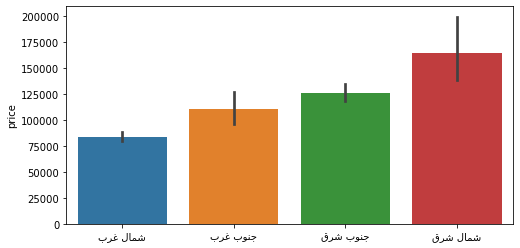

In [91]:



# sns.barplot(data=data_jeddah, x=plot_arabic(data_jeddah['part_of_city']), y=data_jeddah['price'])
# sns.barplot(data=data_riyadh, x=plot_arabic(data['part_of_city']), y=data['size'])


sns.barplot(data=data_jeddah, x=plot_arabic(data_jeddah['part_of_city']), y=data_jeddah['price'])





